In [1]:
import keras

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 310us/step - loss: 2.5138 - acc: 0.4992 - val_loss: 1.7193 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 2s 260us/step - loss: 1.4426 - acc: 0.6891 - val_loss: 1.3435 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 264us/step - loss: 1.0910 - acc: 0.7655 - val_loss: 1.1676 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 288us/step - loss: 0.8661 - acc: 0.8176 - val_loss: 1.0854 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 2s 260us/step - loss: 0.7000 - acc: 0.8492 - val_loss: 0.9850 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 2s 260us/step - loss: 0.5624 - acc: 0.8806 - val_loss: 0.9432 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 258us/step - loss: 0.4568 - acc: 0.9059 - val_loss: 0.9112 - val_acc: 0.8050


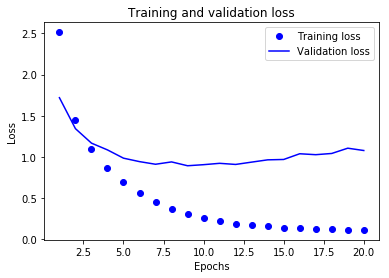

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

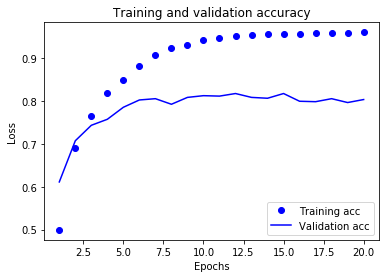

In [9]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 274us/step - loss: 3.5008 - acc: 0.0155 - val_loss: 3.2273 - val_acc: 0.0200
Epoch 2/20
7982/7982 [==============================] - 2s 241us/step - loss: 3.0064 - acc: 0.1468 - val_loss: 2.8391 - val_acc: 0.3240
Epoch 3/20
7982/7982 [==============================] - 2s 225us/step - loss: 2.5569 - acc: 0.3889 - val_loss: 2.4097 - val_acc: 0.5290
Epoch 4/20
7982/7982 [==============================] - 2s 227us/step - loss: 2.1233 - acc: 0.5708 - val_loss: 2.0656 - val_acc: 0.5730
Epoch 5/20
7982/7982 [==============================] - 2s 238us/step - loss: 1.7720 - acc: 0.6203 - val_loss: 1.7940 - val_acc: 0.6050
Epoch 6/20
7982/7982 [==============================] - 2s 259us/step - loss: 1.5264 - acc: 0.6432 - val_loss: 1.6475 - val_acc: 0.6210
Epoch 7/20
7982/7982 [==============================] - 2s 227us/step - loss: 1.3630 - acc: 0.6625 - val_loss: 1.5296 - val_acc: 0.6350


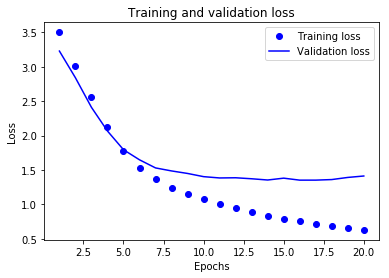

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

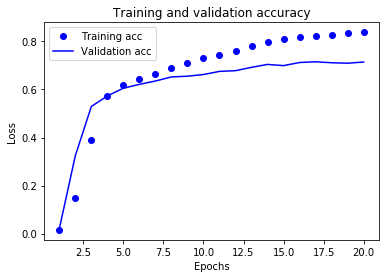

In [12]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()